In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings
warnings.filterwarnings('ignore')

In [81]:
train=pd.read_csv("train.csv")

In [82]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
instances,features = train.shape
print(instances,features)

891 12


In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [85]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [86]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Gallagher, Mr. Martin",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [87]:
train.nunique(axis=0).sort_values(ascending = False)

Name           891
PassengerId    891
Ticket         681
Fare           248
Cabin          147
Age             88
Parch            7
SibSp            7
Embarked         3
Pclass           3
Sex              2
Survived         2
dtype: int64

# Target Feature

In [88]:
survived = train.Survived.where(train.Survived == 1).count()
not_survived = train.Survived.where(train.Survived == 0.0).count()
print("% of survived : ",round((survived/instances)*100,2),"%")
print("% of survived : ",round((not_survived/instances)*100,2),"%")

% of survived :  38.38 %
% of survived :  61.62 %


0    549
1    342
Name: Survived, dtype: int64


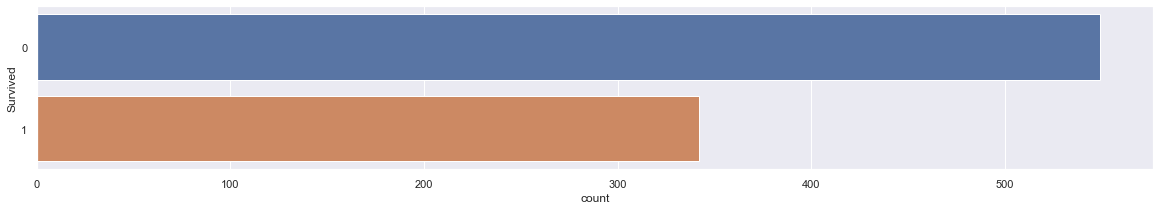

In [89]:
fig = plt.figure(figsize=(20,3))
sns.countplot(y='Survived', data=train);
print(train.Survived.value_counts())

# Feature : Sex

In [90]:
train.Sex.describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [91]:
train.Sex.unique()

array(['male', 'female'], dtype=object)

In [92]:
train['Sex'] = np.where(train['Sex'] == 'female', 1, 0)

In [93]:
males = train.Sex.where(train.Sex == 0).count()
females = train.Sex.where(train.Sex == 1).count()
print("% of Males : ",round((males/instances)*100,2),"%")
print("% of Females : ",round((females/instances)*100,2),"%")

% of Males :  64.76 %
% of Females :  35.24 %


0    549
1    342
Name: Survived, dtype: int64


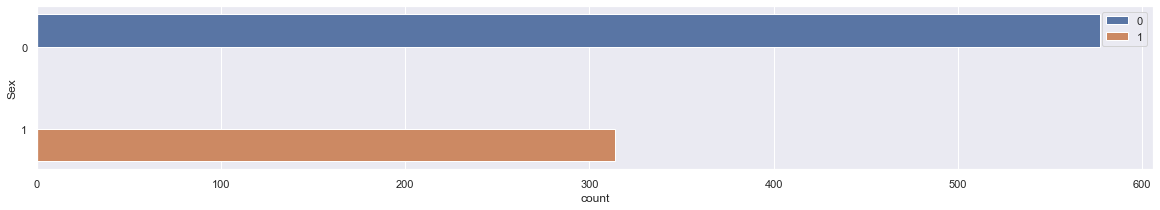

In [94]:
fig = plt.figure(figsize=(20,3))
sns.set_theme(style="darkgrid")
sns.countplot(y='Sex',hue="Sex",data=train)
plt.legend()
print(train.Survived.value_counts())

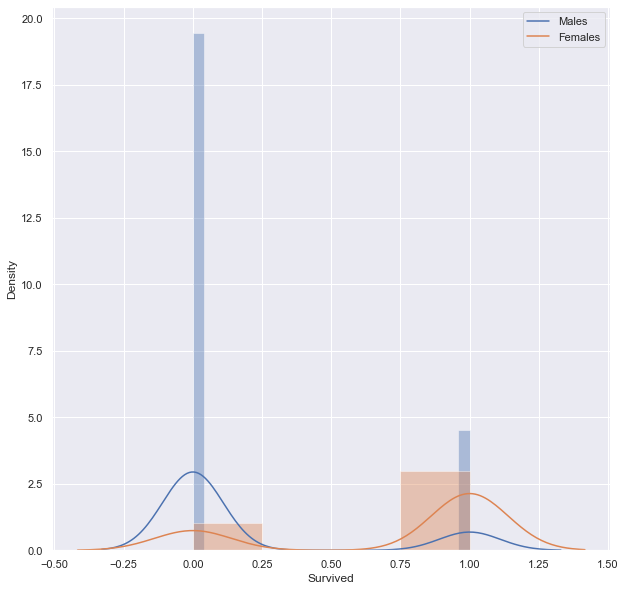

In [95]:
fig = plt.figure(figsize=(10, 10))
sns.distplot(train.Survived.where(train.Sex == 0),kde_kws={'label': 'Males'})
sns.distplot(train.Survived.where(train.Sex == 1),kde_kws={'label': 'Females'})
plt.legend()

# Feature : PClass

In [96]:
train.Pclass.isnull().sum()

0

In [97]:
train.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [98]:
first_class = train.Pclass.where(train.Pclass == 1).count()
second_class = train.Pclass.where(train.Pclass == 2).count()
third_class = train.Pclass.where(train.Pclass == 3).count()
print("% of First Class : ",round((first_class/instances)*100,2),"%")
print("% of Second Class : ",round((second_class/instances)*100,2),"%")
print("% of Third Class : ",round((third_class/instances)*100,2),"%")

% of First Class :  24.24 %
% of Second Class :  20.65 %
% of Third Class :  55.11 %


3    491
1    216
2    184
Name: Pclass, dtype: int64


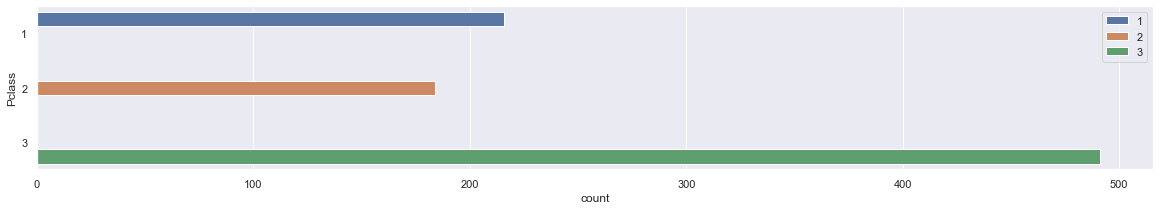

In [99]:
fig = plt.figure(figsize=(20,3))
sns.set_theme(style="darkgrid")
sns.countplot(y='Pclass',hue="Pclass",data=train)
plt.legend()
print(train.Pclass.value_counts())

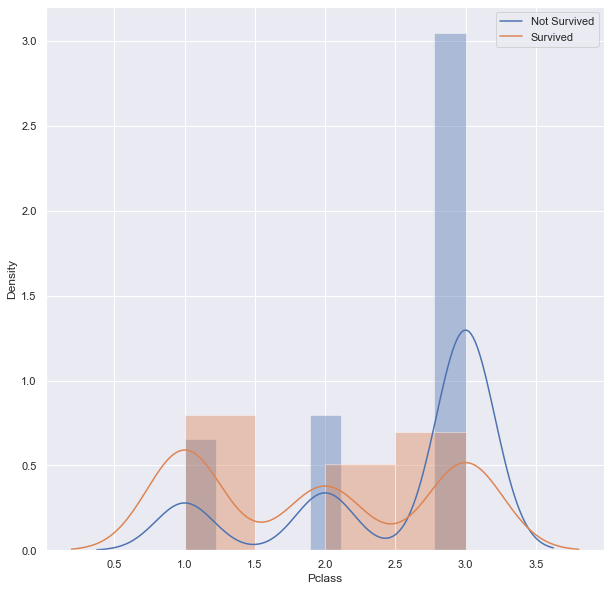

In [100]:
fig = plt.figure(figsize=(10, 10))
sns.distplot(train.loc[train["Survived"] == 0]["Pclass"],kde_kws={'label': 'Not Survived'})
sns.distplot(train.loc[train["Survived"] == 1]["Pclass"],kde_kws={'label': 'Survived'})
plt.legend()

# Feature : Age

In [101]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [102]:
missing = train.Age.isnull().sum()
print("Missing Values : ",missing)
print("% of Third Class : ",round((missing/instances)*100,2),"%")

Missing Values :  177
% of Third Class :  19.87 %


In [103]:
mean_age = int(train.Age.mean())
train.Age = train.Age.fillna(mean_age)

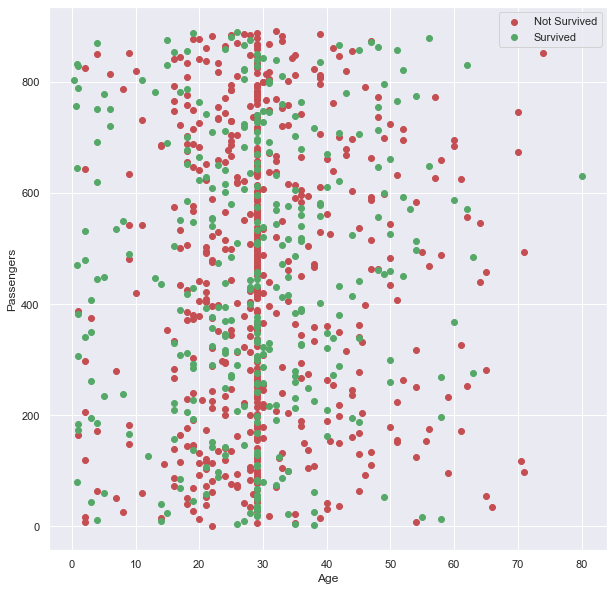

In [104]:
plt.figure(figsize=(10,10))
plt.scatter(train.Age.where(train.Survived==0),train.PassengerId,color="r",label="Not Survived")
plt.scatter(train.Age.where(train.Survived==1),train.PassengerId,color="g",label="Survived")
plt.xlabel("Age")
plt.ylabel("Passengers")
plt.legend()

# Feature : Sibsp

In [105]:
train.SibSp.describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [106]:
train.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [107]:
train.SibSp.isnull().sum()

0

In [108]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<AxesSubplot:xlabel='count', ylabel='SibSp'>

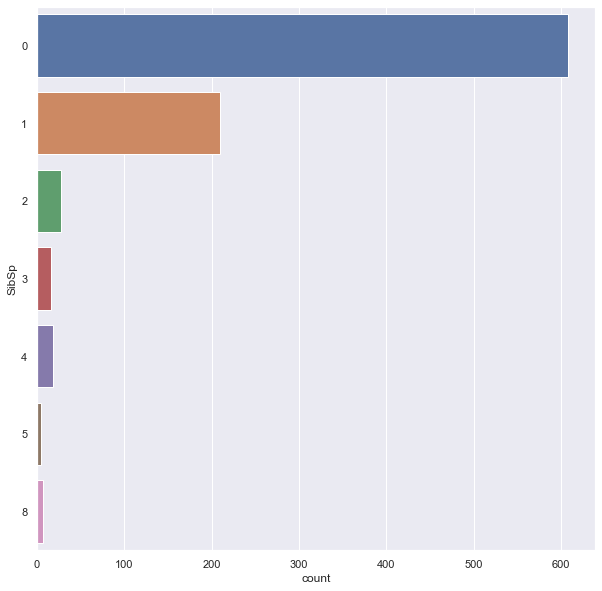

In [109]:
fig = plt.figure(figsize=(10,10))
sns.countplot(y="SibSp", data=train)

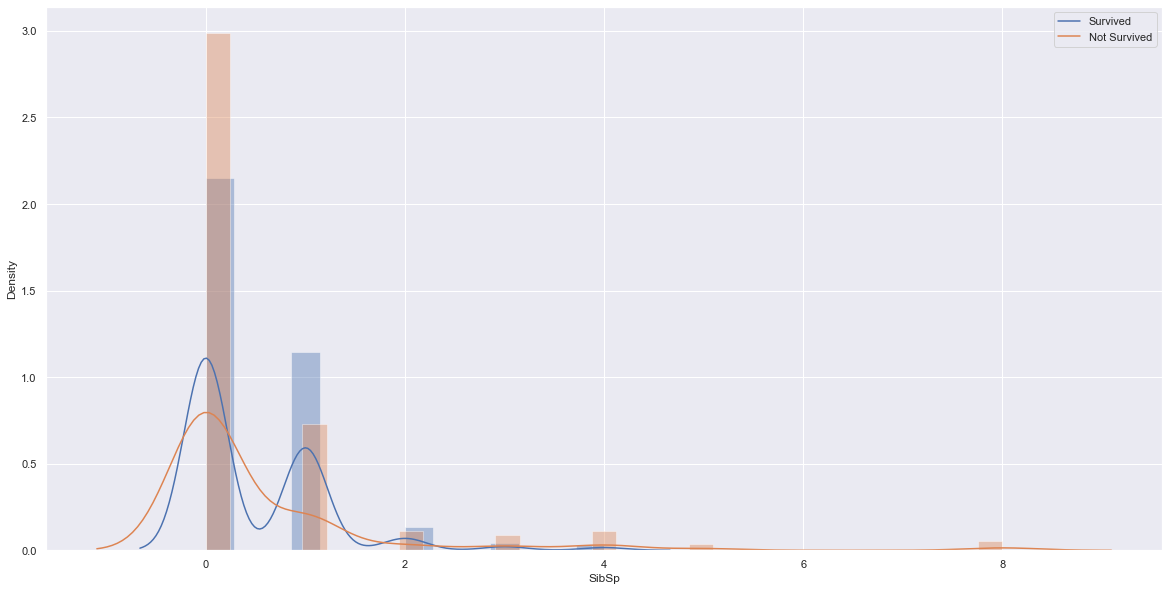

In [110]:
fig = plt.figure(figsize=(20, 10))
sns.distplot(train.loc[train["Survived"] == 1]["SibSp"],kde_kws={'label': 'Survived'})
sns.distplot(train.loc[train["Survived"] == 0]["SibSp"],kde_kws={'label': 'Not Survived'})

plt.legend()

# Feature: Parch

In [111]:
train.Parch.describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [112]:
train.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [113]:
train.Parch.isnull().sum()

0

In [114]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Parch'>

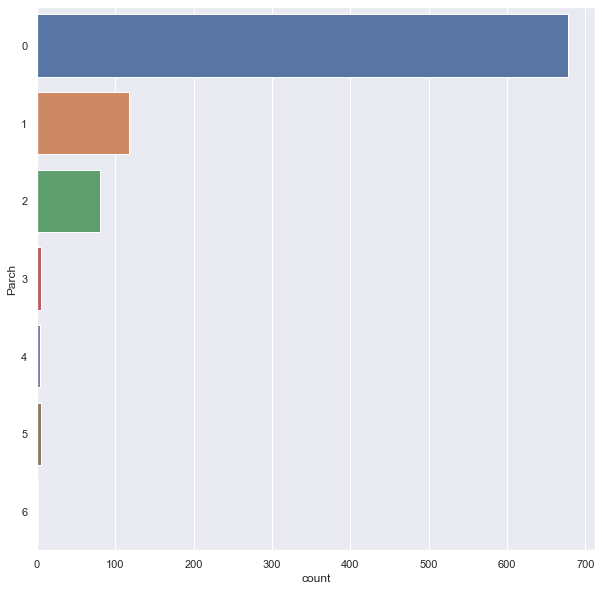

In [115]:
fig = plt.figure(figsize=(10,10))
sns.countplot(y="Parch", data=train)

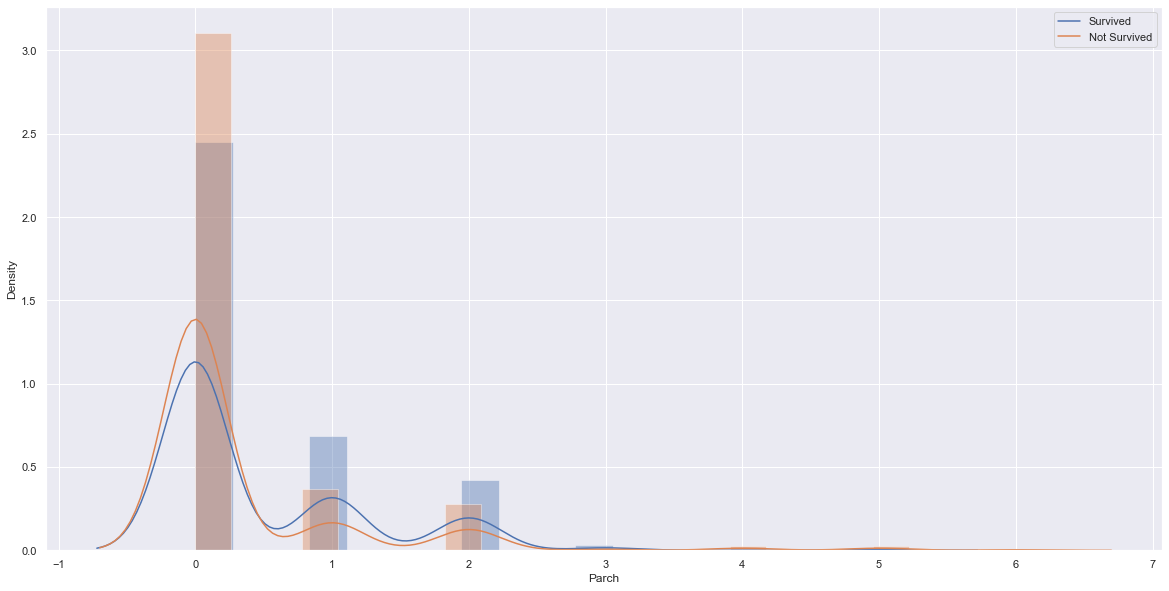

In [116]:
fig = plt.figure(figsize=(20, 10))
sns.distplot(train.loc[train["Survived"] == 1]["Parch"],kde_kws={'label': 'Survived'})
sns.distplot(train.loc[train["Survived"] == 0]["Parch"],kde_kws={'label': 'Not Survived'})

plt.legend()

# Feature : Ticket

In [117]:
train.Ticket.describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

In [118]:
train.Ticket.value_counts()

CA. 2343    7
347082      7
1601        7
3101295     6
CA 2144     6
           ..
248747      1
C 4001      1
237789      1
315096      1
3101276     1
Name: Ticket, Length: 681, dtype: int64

In [119]:
train.Ticket.isnull().sum()

0

In [120]:
train = train.drop(["Ticket"],axis =1)

# Feature : Fare

In [121]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [122]:
train.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [123]:
train.Fare.isnull().sum()

0

In [124]:
df_bin = pd.DataFrame()
df_bin['Fare'] = pd.cut(train['Fare'], bins=5) # discretised

<AxesSubplot:xlabel='count', ylabel='Fare'>

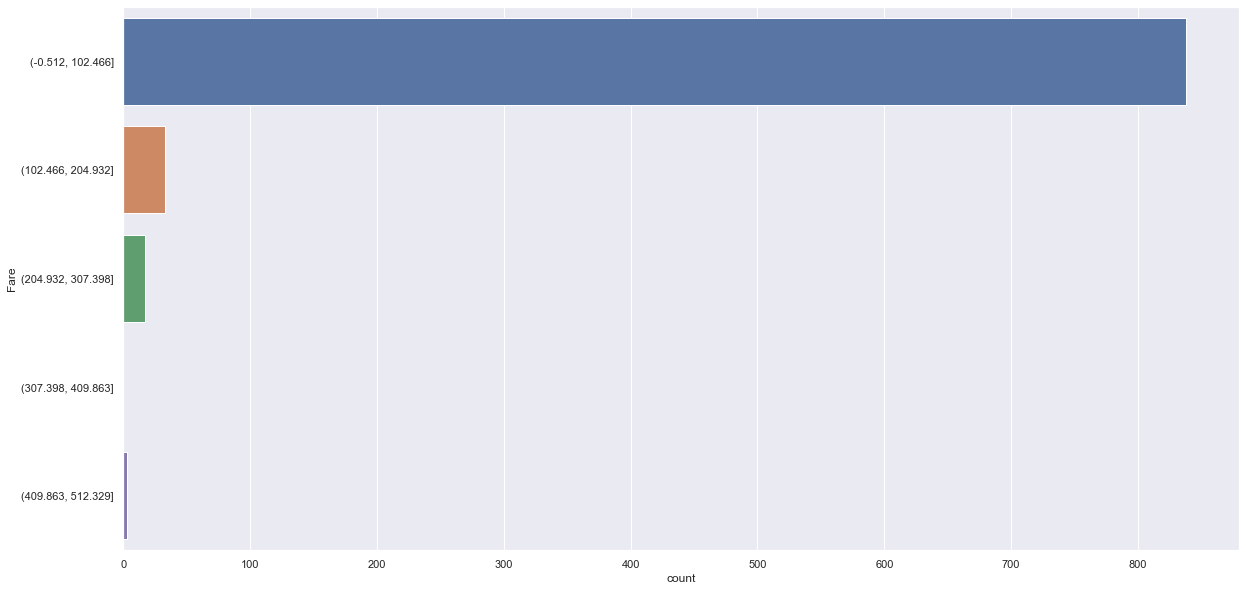

In [125]:
fig = plt.figure(figsize=(20,10))
sns.countplot(y="Fare", data=df_bin)

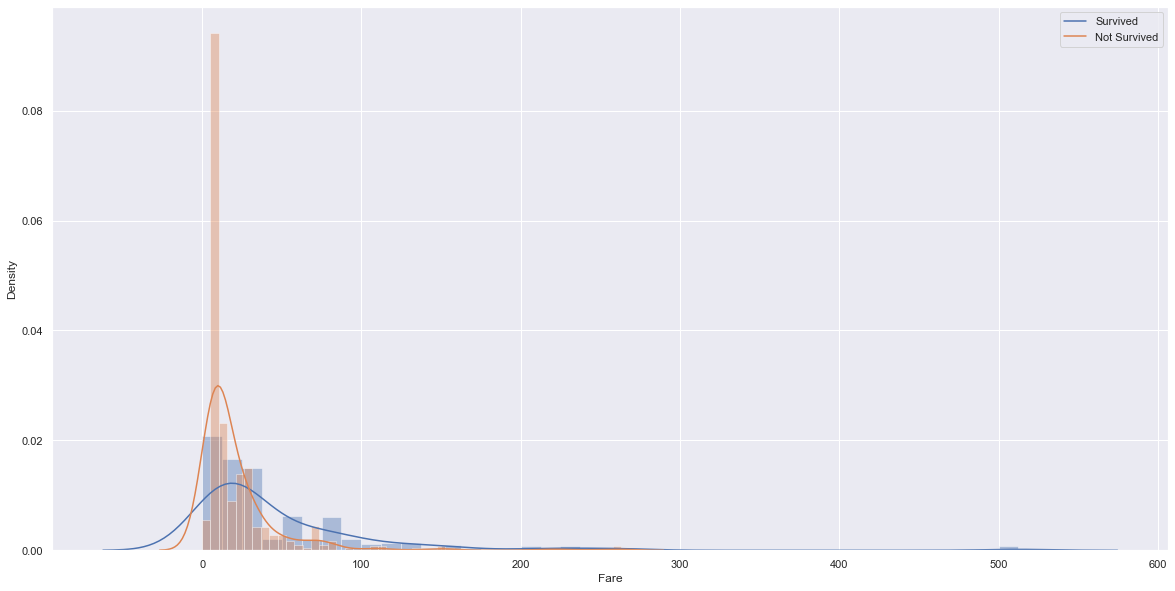

In [126]:
fig = plt.figure(figsize=(20, 10))
sns.distplot(train.loc[train["Survived"] == 1]["Fare"],kde_kws={'label': 'Survived'})
sns.distplot(train.loc[train["Survived"] == 0]["Fare"],kde_kws={'label': 'Not Survived'})

plt.legend()

# Feature: Cabin

In [127]:
train.Cabin.describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

In [128]:
train.Cabin.value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
C22 C26        3
              ..
D37            1
E68            1
D47            1
A23            1
A32            1
Name: Cabin, Length: 147, dtype: int64

In [129]:
train.Cabin.isnull().sum()

687

In [130]:
train = train.drop(["Cabin"],axis =1)

# Feature: Embarked

In [131]:
train.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [132]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [133]:
train.Embarked.isnull().sum()

2

In [134]:
train["Embarked"]= train["Embarked"].fillna(train["Embarked"].mode()[0])

<AxesSubplot:xlabel='count', ylabel='Embarked'>

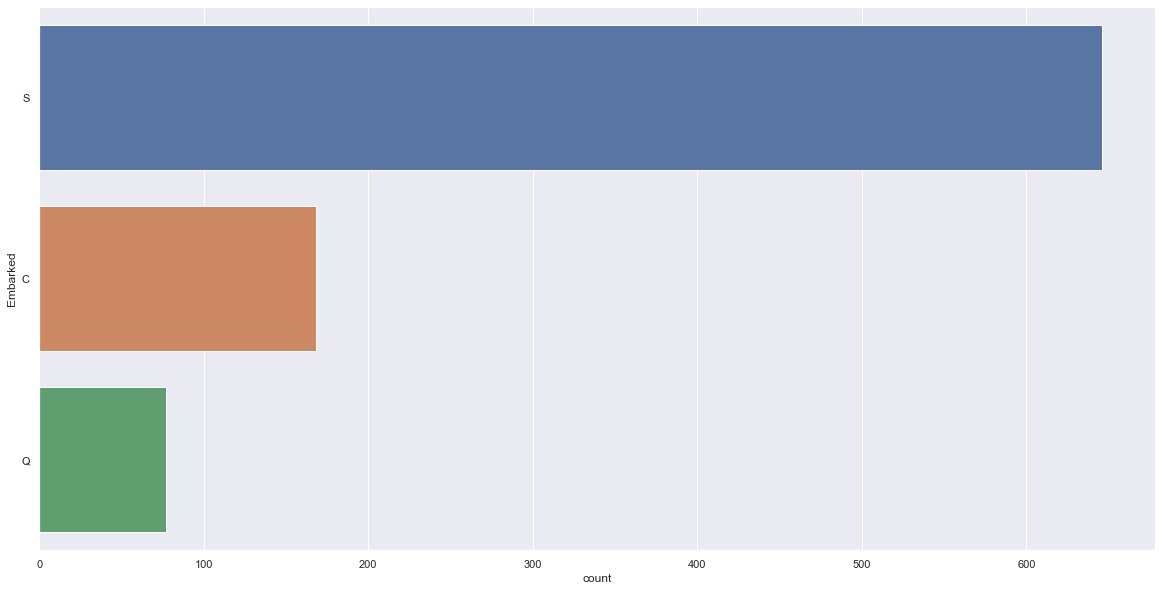

In [135]:
fig = plt.figure(figsize=(20,10))
sns.countplot(y="Embarked", data=train)

# Feature Engineering

In [136]:
train_um = train.select_dtypes(exclude=['object']) # numerical dataframe
train_cat = train.select_dtypes(include=['object']) # object dataframe

In [137]:
train_um.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,7.2500
1,2,1,1,1,38.0,1,0,71.2833
2,3,1,3,1,26.0,0,0,7.9250
3,4,1,1,1,35.0,1,0,53.1000
4,5,0,3,0,35.0,0,0,8.0500


In [138]:
train_cat.head()

,Name,Embarked
0,"Braund, Mr. Owen Harris",S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",C
2,"Heikkinen, Miss. Laina",S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",S
4,"Allen, Mr. William Henry",S


In [139]:
# train = train.drop(["Fare"],axis =1)
train = train.drop(["PassengerId"],axis =1)
train = train.drop(["Name"],axis =1)

In [140]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder() 
train["Embarked"] =lbl.fit_transform(list(train["Embarked"].values))

In [141]:
train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.560236,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.005010,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,0.000000,29.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [142]:
Y = train["Survived"] # storing the labels in Y
X = train.drop(["Survived"],axis=1) # storing the trainind features

In [158]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=42)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(712, 7)
(179, 7)
(712,)
(179,)


In [159]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(xtrain,ytrain)
print(rf_model.score(xtest,ytest)*100)

81.00558659217877


In [160]:
from sklearn.tree import DecisionTreeClassifier
dc_model = DecisionTreeClassifier()
dc_model.fit(xtrain,ytrain)
print(dc_model.score(xtest,ytest)*100)

78.77094972067039


In [162]:
df_classifier = DecisionTreeClassifier()

params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
             'min_samples_split': [2, 3,4,5,6]}

gs_DT = GridSearchCV(estimator=df_classifier, 
                     param_grid=params_DT, 
                     cv=10,
                     verbose=1, 
                     scoring='accuracy')
gs_DT.fit(xtrain,ytrain)
print("Best: %f using %s" % (gs_DT.best_score_, gs_DT.best_params_))

Fitting 10 folds for each of 80 candidates, totalling 800 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Best: 0.824452 using {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:    4.7s finished


In [146]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier(criterion='gini')
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']

# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X,Y)
# summarize results
best_random = grid_result.best_params_
print("Best: %f using %s" % ((grid_result.best_score_)*100, grid_result.best_params_))

Best: 81.441948 using {'max_features': 'log2', 'n_estimators': 1000}


In [161]:
from xgboost import XGBClassifier
my_model = XGBClassifier(learning_rate = 0.1,n_estimators=100)
my_model.fit(xtrain,ytrain)
my_model.score(xtest,ytest)

[23:17:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8268156424581006

# Submission

In [148]:
test=pd.read_csv("test.csv")

In [149]:
testP = test.PassengerId

In [150]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [151]:
# test = test.drop(["Fare"],axis =1)
test = test.drop(["PassengerId"],axis =1)
test = test.drop(["Name"],axis =1)
test = test.drop(["Cabin"],axis =1)
test = test.drop(["Ticket"],axis =1)

In [152]:
mean_age = int(test.Age.mean())
test.Age = test.Age.fillna(mean_age)

In [153]:
test['Sex'] = np.where(test['Sex'] == 'female', 1, 0)

In [154]:
lbl = LabelEncoder() 
test["Embarked"] =lbl.fit_transform(list(test["Embarked"].values))

In [165]:
mean_fair = int(test.Fare.mean())
test.Fare = test.Fare.fillna(mean_age)

In [166]:
test.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.363636,30.216507,0.447368,0.392344,35.613726,1.401914
std,0.841838,0.481622,12.635016,0.896760,0.981429,55.841179,0.854496
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,1.000000
50%,3.000000,0.000000,30.000000,0.000000,0.000000,14.454200,2.000000
75%,3.000000,1.000000,35.750000,1.000000,0.000000,31.471875,2.000000
max,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000


In [167]:
predictions = gs_DT.predict(test)

In [168]:
submission = pd.DataFrame(predictions)

submission.columns = ['Survived']
# test_data.Id

submission = submission.set_index(testP)
submission.to_csv('submission.csv')